         Date      Open      High       Low     Close  Adj Close  Volume
0  2000-01-03  8.967487  8.991149  8.719049  8.943827    2062807     NaN
1  2000-01-04  9.026635  9.322397  8.943822  8.967483    2557142     NaN
2  2000-01-05  9.085792  9.168604  9.026638  9.109452    2295467     NaN
3  2000-01-06  8.707214  8.884671  8.517927  8.872841    1539456     NaN
4  2000-01-07  9.038470  9.085792  8.896504  9.014809    1511230     NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6289 entries, 0 to 6288
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6289 non-null   object 
 1   Open       6289 non-null   float64
 2   High       6289 non-null   float64
 3   Low        6289 non-null   float64
 4   Close      6289 non-null   float64
 5   Adj Close  6289 non-null   int64  
 6   Volume     0 non-null      float64
dtypes: float64(5), int64(1), object(1)
memory usage: 344.1+ KB
None
              Open         

2025-08-07 11:49:31.147844: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/anaconda/envs/azureml_py38/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.1702 - root_mean_squared_error: 0.2959
Epoch 2/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0754 - root_mean_squared_error: 0.1226
Epoch 3/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0712 - root_mean_squared_error: 0.1141
Epoch 4/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0686 - root_mean_squared_error: 0.1109
Epoch 5/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0700 - root_mean_squared_error: 0.1167
Epoch 6/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 

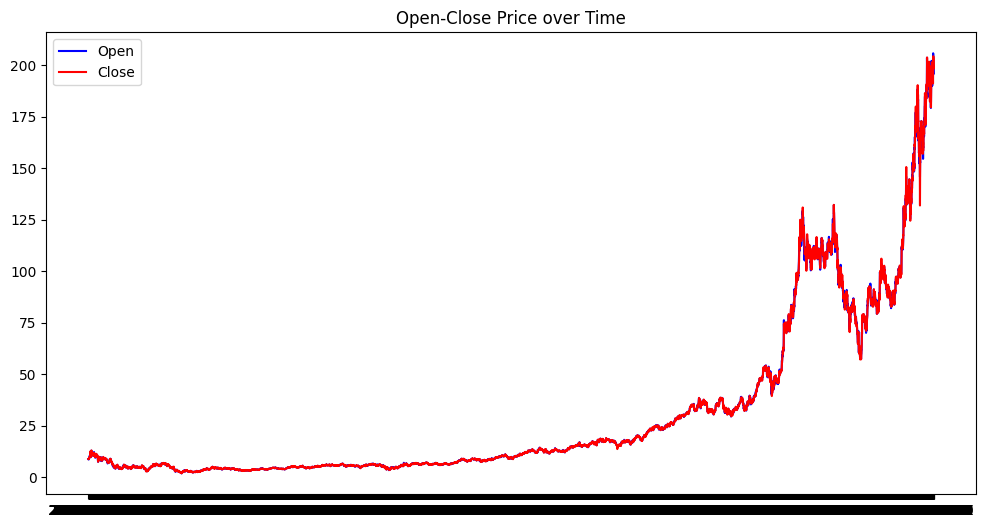

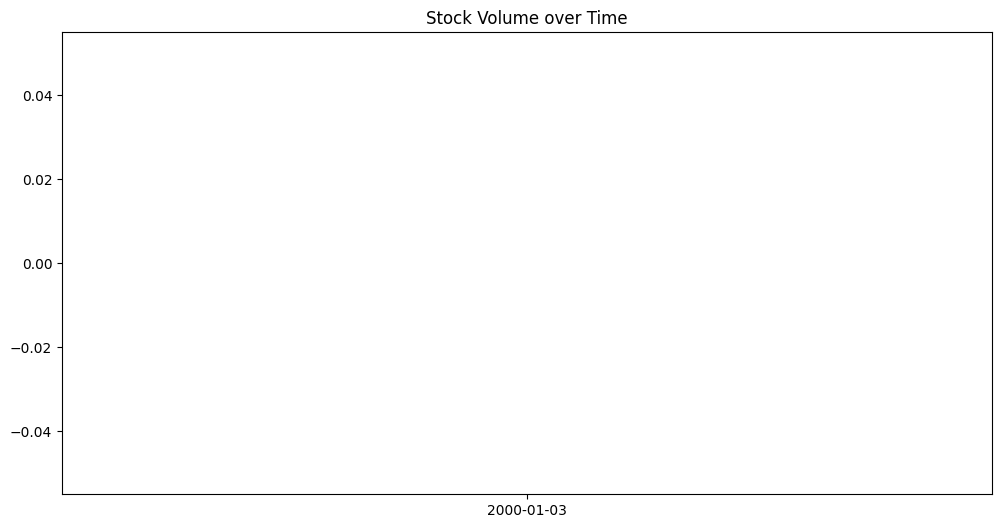

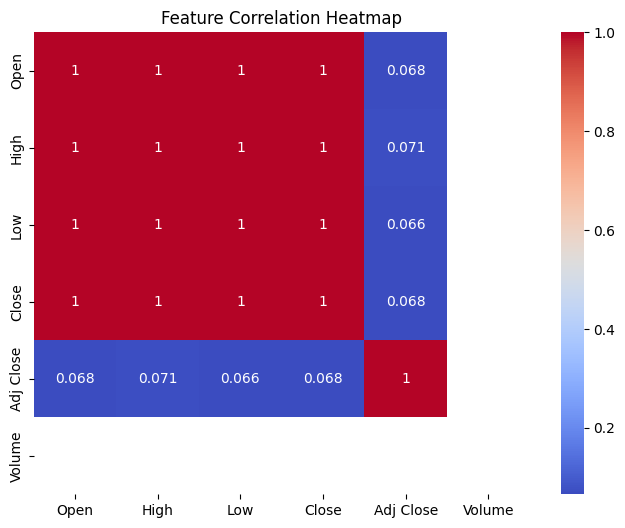

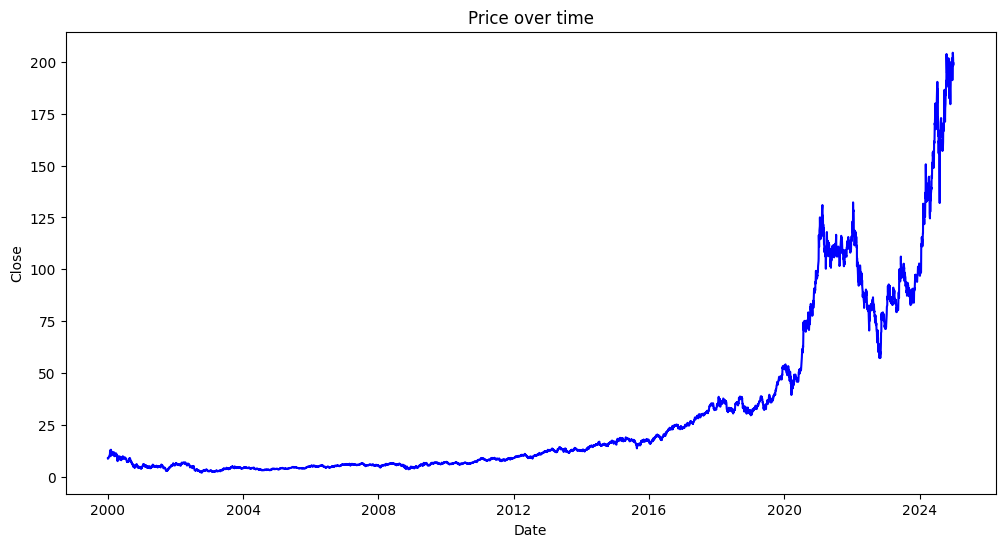

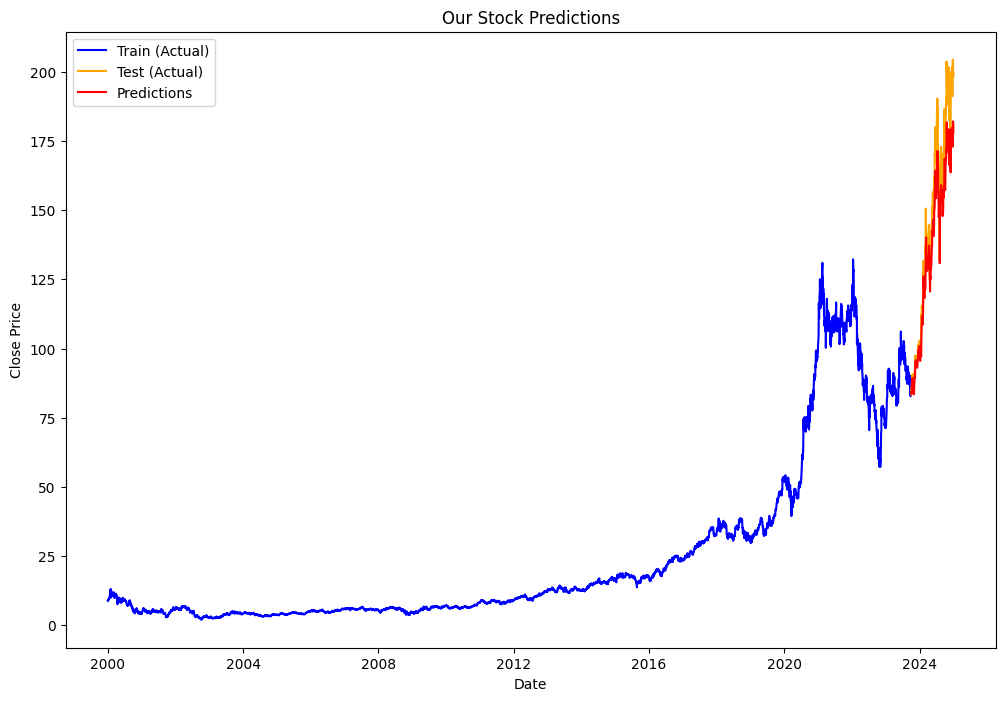

In [2]:
from tensorflow import keras 
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
from datetime import datetime


data = pd.read_csv("TSMC_Historical.csv")
print(data.head())
print(data.info())
print(data.describe())


# Initial Data Visualization
# Plot 1 - Open and Close Prices of time
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Open'], label="Open",color="blue")
plt.plot(data['Date'], data['Close'], label="Close",color="red")
plt.title("Open-Close Price over Time")
plt.legend()
# plt.show()

# Plot 2 - Trading Volume (check for outliers)
plt.figure(figsize=(12,6))
plt.plot(data['Date'],data['Volume'],label="Volume",color="orange")
plt.title("Stock Volume over Time")
# plt.show()


# Drop non-numeric columns
numeric_data = data.select_dtypes(include=["int64","float64"])

# Plot 3 - Check for correlation between features
plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
# plt.show()


# Convert the Data into Date time then create a date filter
data['Date'] = pd.to_datetime(data['Date'])

prediction = data.loc[
    (data['Date'] > datetime(2013,1,1)) &
    (data['Date'] < datetime(2018,1,1))
]

plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Close'],color="blue")
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Price over time")


# Prepare for the LSTM Model (Sequential)
stock_close = data.filter(["Close"])
dataset = stock_close.values #convert to numpy array
training_data_len = int(np.ceil(len(dataset) * 0.95))

# Preprocessing Stages
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

training_data = scaled_data[:training_data_len] #95% of all out data

X_train, y_train = [], []


# Create a sliding window for our stock (60 days)
for i in range(60, len(training_data)):
    X_train.append(training_data[i-60:i, 0])
    y_train.append(training_data[i,0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


# Build the Model
model = keras.models.Sequential()

# First Layer
model.add(keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1],1)))

# Second Layer
model.add(keras.layers.LSTM(64, return_sequences=False))

# 3rd Layer (Dense)
model.add(keras.layers.Dense(128, activation="relu"))

# 4th Layer (Dropout)
model.add(keras.layers.Dropout(0.5))

# Final Output Layer
model.add(keras.layers.Dense(1))

model.summary()
model.compile(optimizer="adam",
              loss="mae",
              metrics=[keras.metrics.RootMeanSquaredError()])


training = model.fit(X_train, y_train, epochs=20, batch_size=32)

# Prep the test data
test_data = scaled_data[training_data_len - 60:]
X_test, y_test = [], dataset[training_data_len:]


for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1 ))

# Make a Prediction
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


# Plotting data
train = data[:training_data_len]
test =  data[training_data_len:]

test = test.copy()

test['Predictions'] = predictions

plt.figure(figsize=(12,8))
plt.plot(train['Date'], train['Close'], label="Train (Actual)", color='blue')
plt.plot(test['Date'], test['Close'], label="Test (Actual)", color='orange')
plt.plot(test['Date'], test['Predictions'], label="Predictions", color='red')
plt.title("Our Stock Predictions")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()